In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Load the dataset
data = pd.read_csv("Datasets/Social_Network_Ads.csv")

# Data preprocessing
X = data.iloc[:, [2, 3]].values  # Age and EstimatedSalary as features
y = data.iloc[:, 4].values  # Purchased as target

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Compute TP, FP, TN, FN
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute Error Rate
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Compute Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Compute Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Confusion Matrix:
[[65  3]
 [ 8 24]]
Accuracy: 0.89
Error Rate: 0.10999999999999999
Precision: 0.8888888888888888
Recall: 0.75


/tmp/ipykernel_14095/3824409547.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[y == j, 0], X[y == j, 1], c=np.array(sns.color_palette("hsv", 2))[i], label=j)


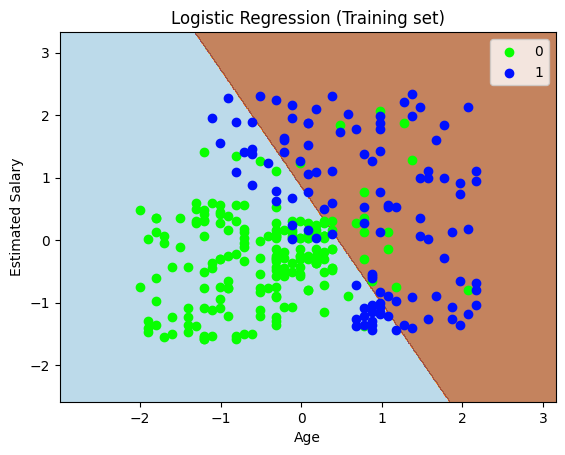

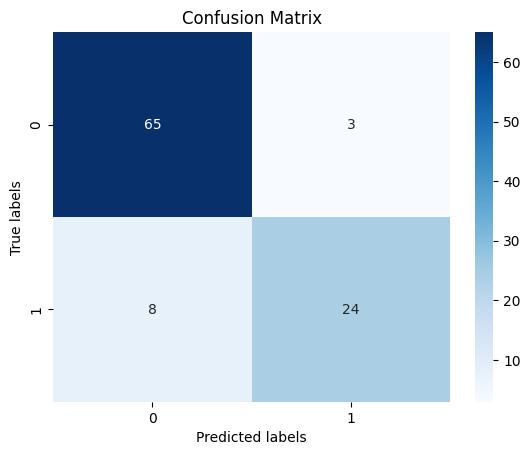

Accuracy: 0.89
Error Rate: 0.10999999999999999
Precision: 0.8888888888888888
Recall: 0.75


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot decision boundary function
def plot_decision_boundary(X, y, classifier, title):
    # Plotting decision boundary
    X1, X2 = np.meshgrid(np.arange(start=X[:, 0].min() - 1, stop=X[:, 0].max() + 1, step=0.01),
                         np.arange(start=X[:, 1].min() - 1, stop=X[:, 1].max() + 1, step=0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=plt.cm.Paired)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    # Plot data points
    for i, j in enumerate(np.unique(y)):
        plt.scatter(X[y == j, 0], X[y == j, 1], c=np.array(sns.color_palette("hsv", 2))[i], label=j)

    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()

# Plot confusion matrix function
def plot_confusion_matrix(cm):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

# Load the dataset
data = pd.read_csv("Datasets/Social_Network_Ads.csv")

# Data preprocessing
X = data.iloc[:, [2, 3]].values  # Age and EstimatedSalary as features
y = data.iloc[:, 4].values  # Purchased as target

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting decision boundary
plot_decision_boundary(X_train, y_train, classifier, title="Logistic Regression (Training set)")

# Plotting confusion matrix
plot_confusion_matrix(cm)

# Compute TP, FP, TN, FN
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute Error Rate
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Compute Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Compute Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)
